In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import json
from Models import AssistantTool
from Models import NASA

### Download the information

In [2]:
projects = pd.read_csv("Data/Projects.csv", encoding = "latin_1")
solar_panels = pd.read_csv("Data/SolarPanels.csv")
inverters = pd.read_csv("Data/Inverter.csv")

### Data preprocessing

In [3]:
projects.drop(columns = ["#","link","link_company","coordinates"], inplace=True)
projects['regime'].astype("category")
projects['kind'].astype("category")
projects['surface_type'].astype("category")
projects['date'] = pd.to_datetime(projects['date'], format="%d/%m/%Y")
projects.describe()

,latitude,longitude,date,percentage_of_electrical_energy_supplied,power,estimated_power_produced_annually,atmospheric_emission_prevention,used_emission_factor,area
count,30.000000,30.000000,30,10.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,1.800000e+01
mean,6.208974,-74.646901,2018-08-13 23:12:00,67.164043,6780.822333,1.873027e+07,6.905382e+07,0.369867,3.909112e+05
min,2.940861,-76.593333,2017-12-07 00:00:00,20.000000,3.200000,3.655400e+02,1.598400e+03,0.360000,7.000000e+01
25%,4.518986,-75.478319,2018-07-23 00:00:00,34.980320,40.487500,3.812850e+04,1.493450e+04,0.367000,1.212510e+03
50%,4.760862,-74.807250,2018-08-26 12:00:00,75.500000,155.100000,1.426850e+05,7.454300e+04,0.367000,3.508205e+03
75%,8.885021,-74.086389,2018-10-20 00:00:00,100.000000,417.750000,5.421750e+05,2.134172e+05,0.367000,1.476625e+04
max,11.018806,-67.905361,2018-11-25 00:00:00,100.000000,90000.000000,3.380152e+08,2.000000e+09,0.401000,4.371700e+06
std,2.805354,1.559580,NaN,33.775193,22391.500558,6.848216e+07,3.648860e+08,0.011016,1.105009e+06


In [4]:
solar_panels.describe()

,Module Area [m^2],Series Cells,Parallel C-S,Isco,Voco,Impo,Vmpo,aIsc,aImp,C0,...,fd,a,b,C4,C5,Ixo,Ixxo,C6,C7,Data source
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,103.000000
mean,1.286334,58.208812,1.229885,5.399195,37.776689,4.909934,29.858196,0.000521,-0.000080,1.000763,...,0.994253,-3.512149,-0.074033,0.992577,0.007425,5.305397,3.493573,1.118648,-0.118648,1.058252
std,2.898243,66.922797,0.801167,3.335621,42.370972,3.040168,33.311955,0.000235,0.000356,0.031420,...,0.075664,0.138122,0.011894,0.016089,0.016089,3.286419,2.161075,0.028140,0.028140,0.415986
min,0.058000,5.000000,1.000000,0.300000,10.700000,0.270000,7.500000,-0.000060,-0.000860,0.924000,...,0.000000,-3.669000,-0.130400,0.963000,-0.059000,0.295000,0.196000,1.029700,-0.202000,1.000000
25%,0.632000,36.000000,1.000000,3.622500,21.500000,3.267500,16.900000,0.000390,-0.000210,0.988000,...,1.000000,-3.560000,-0.075000,0.985000,0.005500,3.547500,2.335000,1.105000,-0.133000,1.000000
50%,1.008000,41.000000,1.000000,4.968500,24.450000,4.550000,18.950000,0.000540,-0.000142,0.995500,...,1.000000,-3.560000,-0.075000,0.988500,0.012000,4.790000,3.235000,1.118300,-0.118300,1.000000
75%,1.310000,72.000000,1.000000,7.405250,43.500000,6.677500,34.750000,0.000650,-0.000006,1.006000,...,1.000000,-3.501750,-0.072100,0.994500,0.015000,7.291250,4.787500,1.133000,-0.105000,1.000000
max,50.700000,864.000000,12.000000,34.720000,525.980000,30.860000,413.140000,0.001200,0.001470,1.121000,...,1.000000,-2.810000,-0.045500,1.059000,0.037000,33.800000,21.800000,1.202000,-0.029700,4.000000


In [5]:
inverters.describe()

,ac Voltage,Vintage,Paco,Pdco,Vdco,Pso,Co,C1,C2,C3,Pnt,Vdcmax,Idcmax,MPPT-Low,MPPT-Hi,Tamb Max,Weight,Unique ID#
count,851.000000,833.000000,8.510000e+02,8.510000e+02,849.000000,849.000000,8.490000e+02,849.000000,849.000000,849.000000,851.000000,574.000000,556.000000,776.000000,776.000000,566.000000,589.000000,851.000000
mean,256.772033,2008.679472,3.995989e+04,4.163706e+04,309.701405,255.417739,-8.322371e-06,-0.000003,0.000774,-0.009410,17.496242,528.962195,164.781745,201.846649,460.345361,65.563604,865.074553,426.755582
std,89.127944,2.062549,1.217026e+05,1.259336e+05,96.634601,822.344362,1.695201e-05,0.000264,0.006152,0.079868,57.112217,143.552174,409.939698,81.741297,129.700337,33.165213,2631.648014,246.712128
min,48.000000,2005.000000,1.750000e+02,1.847213e+02,26.033333,0.669215,-2.715962e-04,-0.001242,-0.045738,-1.568374,-335.800000,42.000000,6.300000,16.000000,29.000000,-45.000000,2.200000,1.000000
25%,208.000000,2007.000000,3.000000e+03,3.147321e+03,274.990152,22.720135,-8.378283e-06,-0.000053,-0.000594,-0.002337,0.245000,500.000000,15.000000,150.000000,430.000000,50.000000,46.250000,213.500000
50%,240.000000,2009.000000,4.470000e+03,4.724759e+03,317.959524,31.601704,-4.704421e-06,0.000011,0.000961,-0.000363,0.720000,600.000000,22.100000,200.000000,480.000000,55.000000,60.000000,426.000000
75%,240.000000,2010.000000,1.012900e+04,1.073824e+04,364.995714,57.555459,-1.538299e-06,0.000047,0.002037,0.000364,3.860000,600.000000,96.000000,250.000000,530.000000,65.000000,143.000000,639.500000
max,600.000000,2012.000000,1.400000e+06,1.454615e+06,812.497619,14618.815727,1.897993e-08,0.003955,0.053061,0.028709,634.110000,1000.000000,4412.000000,525.000000,850.000000,158.000000,30000.000000,854.000000


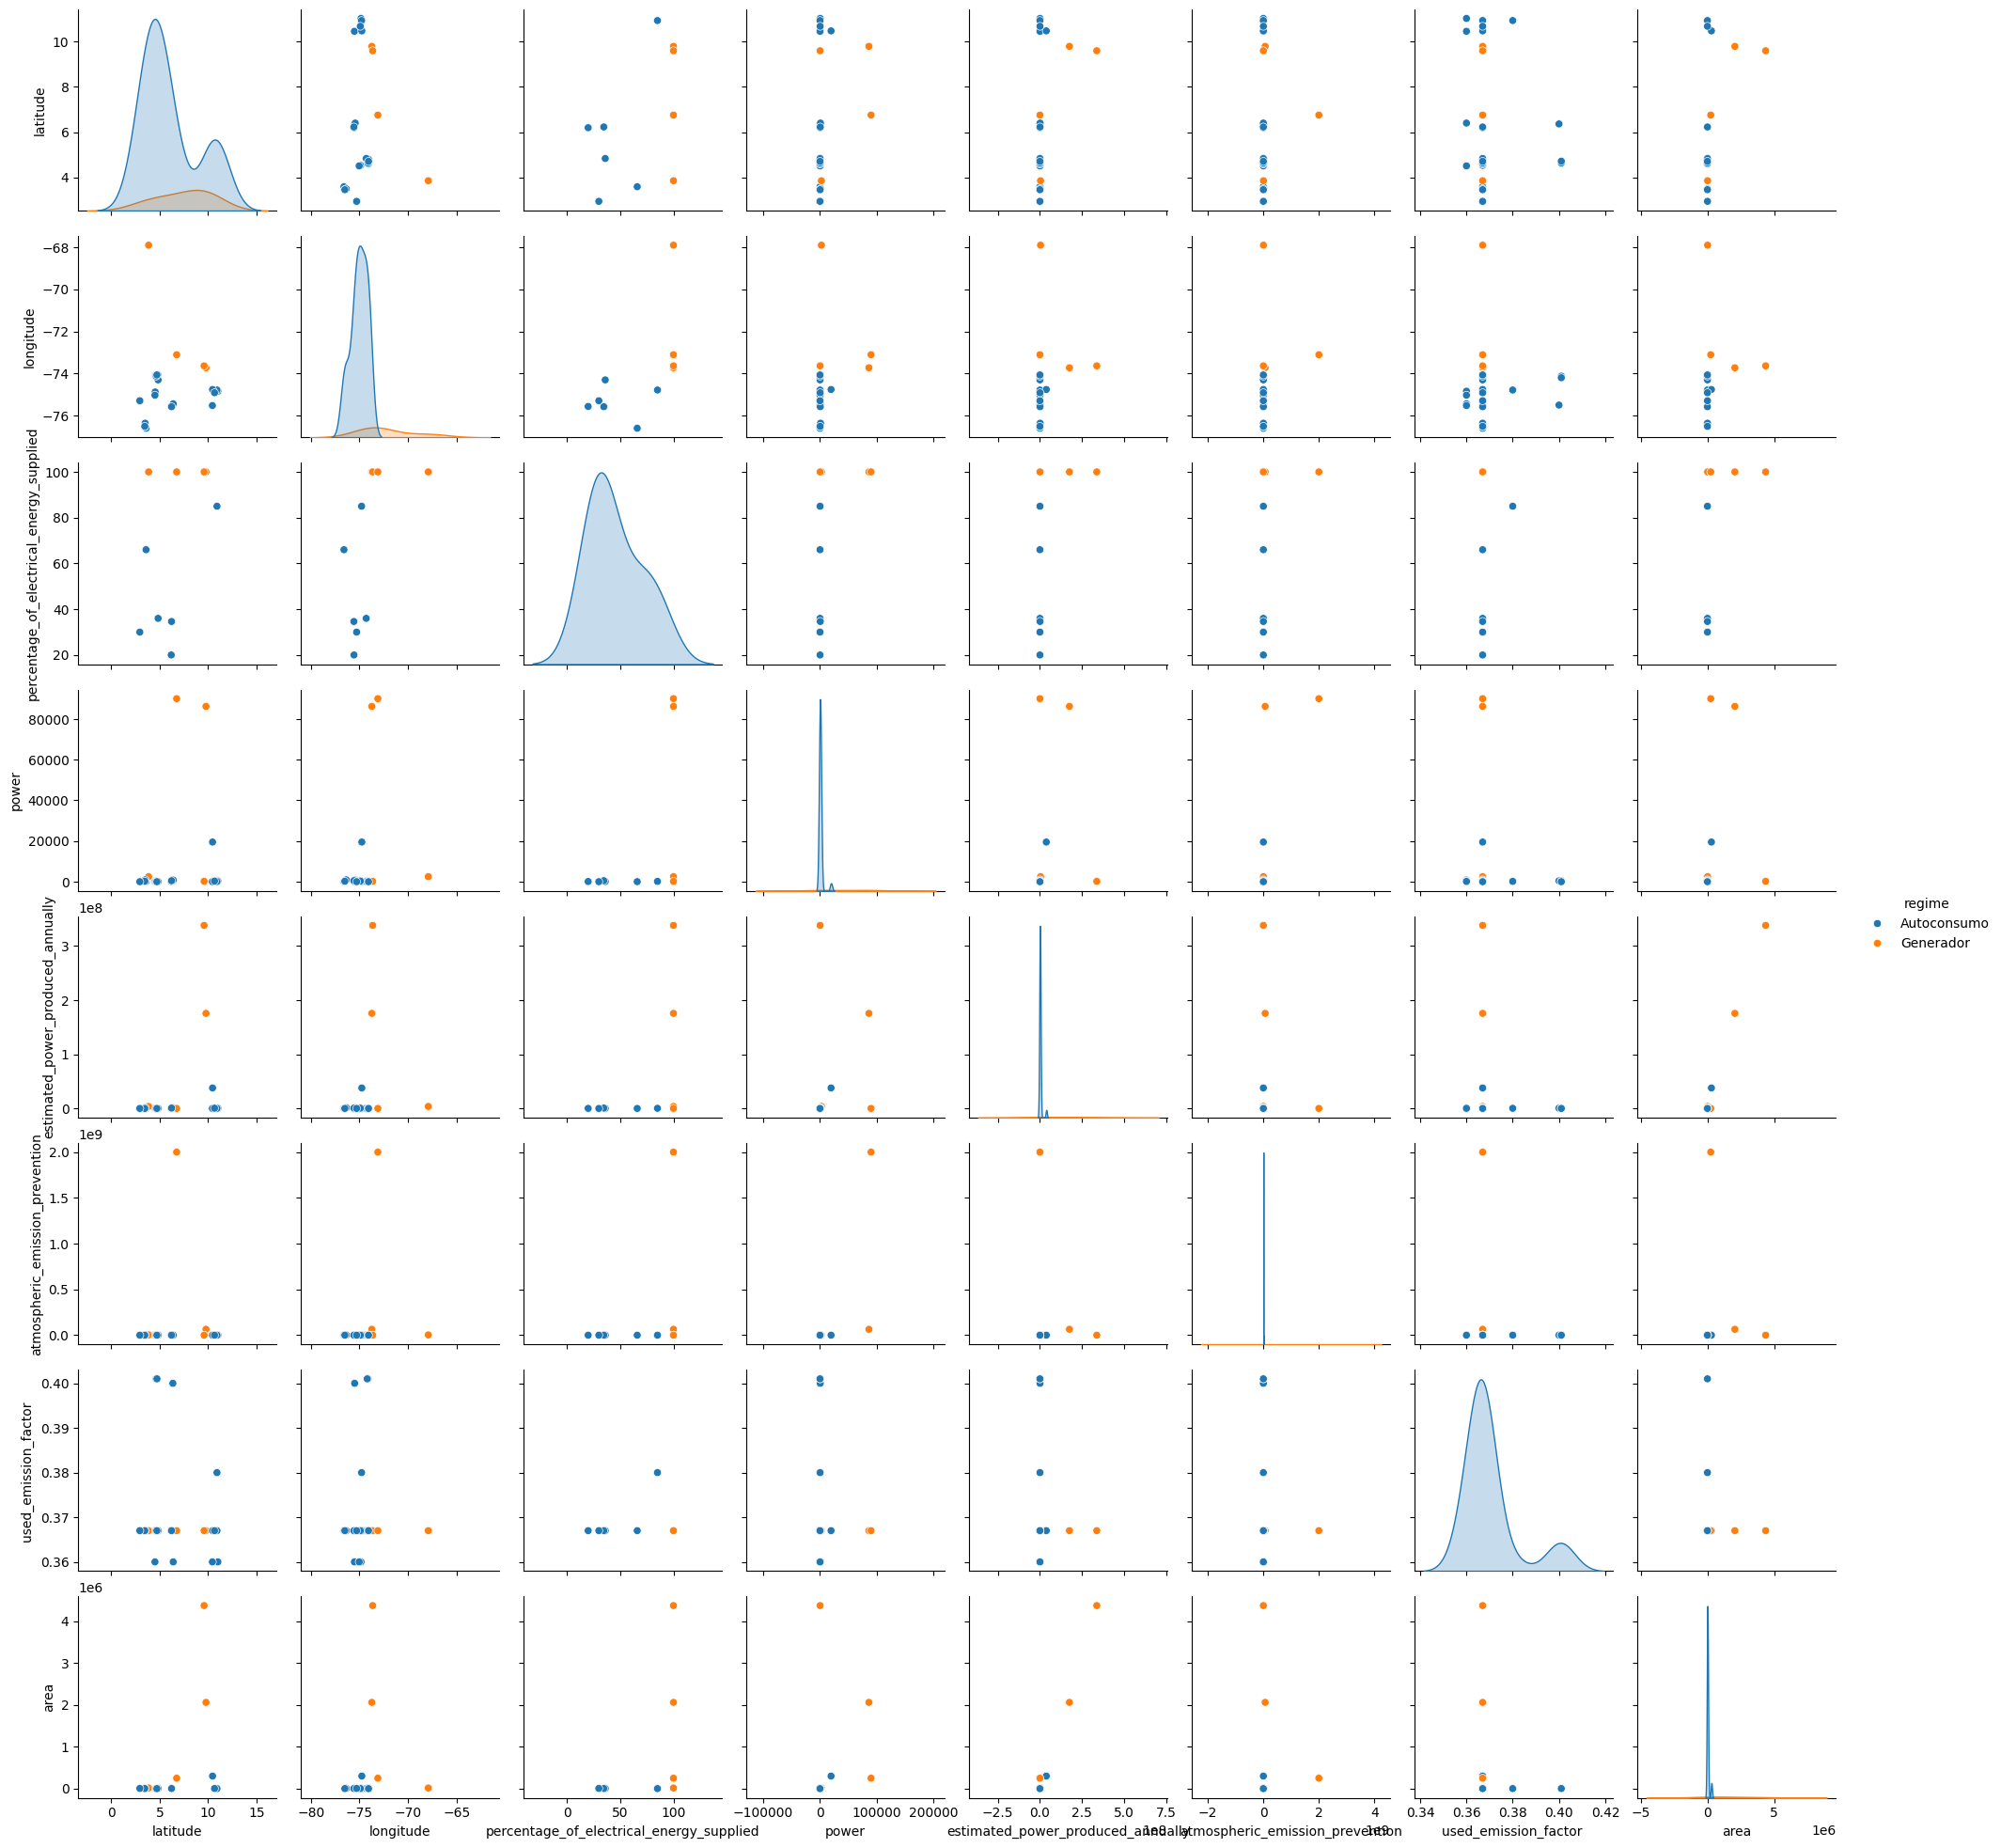

In [6]:
sns.pairplot(projects,hue='regime')

In [7]:
projects_transformed = projects.interpolate(method="linear")
projects_transformed['area'] = projects_transformed['area'].fillna(projects_transformed['area'].median())

/var/folders/5t/jfkgzzg138n_k1mcl01nngx40000gn/T/ipykernel_78447/2066024221.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  projects_transformed = projects.interpolate(method="linear")


### Find more information about the solar projects

#### Find the average solar hours

In [8]:
answer_list = list()   
assistant_tool = AssistantTool.AssistantTool()
solar_information = NASA.SolarInformation()
average_solar_hours_list = []
project_index_list = []
for project_index in range(0,len(projects_transformed)):

    project = projects_transformed.iloc[project_index]
    parameters = {
        "start":"20230101",
        "end":"20240101",
        "latitude":project['latitude'],
        "longitude":project['longitude'],
        "community":"re",
        "parameters":"ALLSKY_SFC_SW_DWN",
        "format":"json",
        "header":"true",
        "time-standard":"lst"
    }
    average_solar_hours_list.append(solar_information.get_average_solar_hours(parameters))
    project_index_list.append(project_index)
projects_transformed['average_solar_hours'] = average_solar_hours_list
projects_transformed['id'] = project_index_list

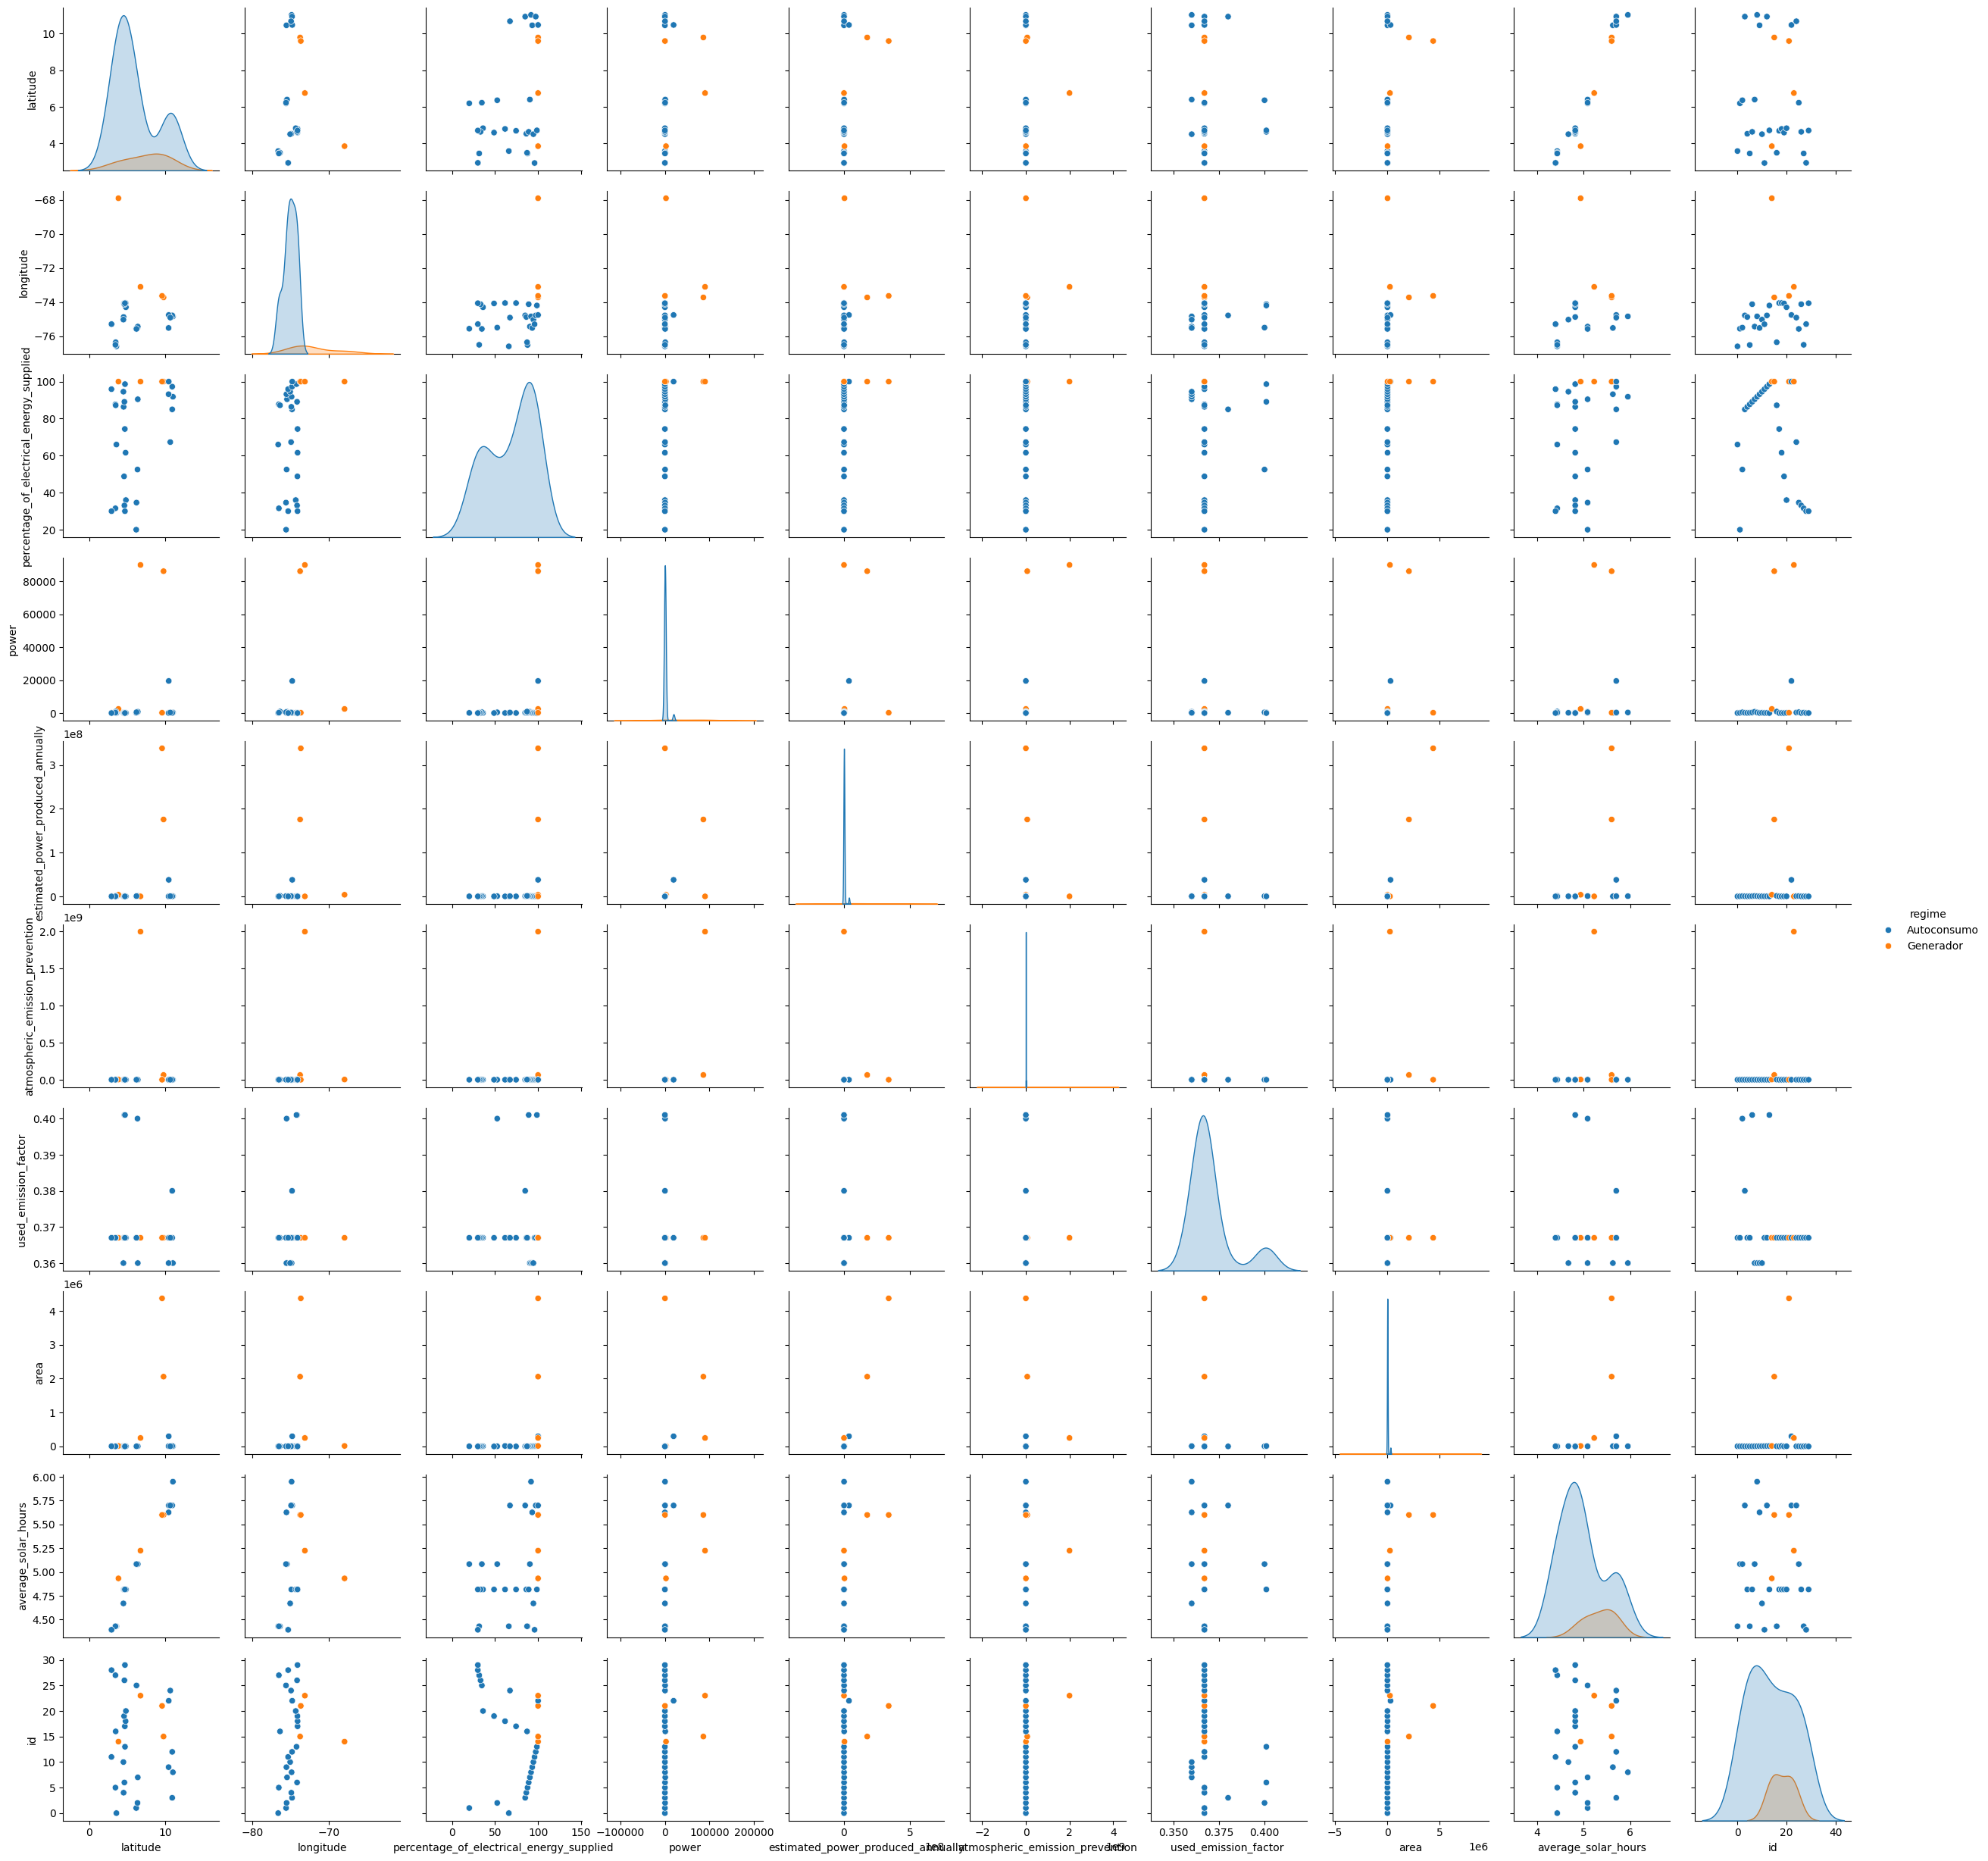

In [9]:
sns.pairplot(projects_transformed,hue='regime')

In [19]:
answer_list = []
assistant_tool = AssistantTool.AssistantTool()
for index_solar_panel in range(0,10):
    solar_panel = json.loads(solar_panels.iloc[index_solar_panel].to_json())
    solar_panel['id'] = index_solar_panel

    for index_inverter in range(0,10):
        inverter = json.loads(inverters.iloc[index_inverter].to_json())
        inverter['id'] = index_inverter

        for index_project in range(0,len(projects_transformed)):
            
            project = json.loads(projects_transformed.iloc[index_project].to_json())
            project['id'] = index_project

            answer_list.append(assistant_tool.execute(project, solar_panel, inverter))

Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong
Something was wrong


In [20]:
answer_list

[{'project_id': 0,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 1,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 2,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 3,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 4,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 5,
  'total_number_of_panels': 1,
  'panels_in_parallel': 12,
  'panels_in_series': 1,
  'panel_reference': 0,
  'inverter_reference': 0},
 {'project_id': 6,
  'total_number_of_panels': 1,
  'panels_in_paralle

### Solar panels information

In [10]:
solar_panels

,Model,Vintage,Module Area [m^2],Material,Series Cells,Parallel C-S,Isco,Voco,Impo,Vmpo,...,fd,a,b,C4,C5,Ixo,Ixxo,C6,C7,Data source
0,12-PW1000(95W)-Array,2001,10.780,mc-Si,72,12,34.720,43.320,30.860,32.690,...,1,-3.480,-0.08500,0.97000,0.030000,33.8000,21.8000,1.1090,-0.1090,1.0
1,16-SanyoH552BA2-Array,2004,18.400,HIT-Si,768,2,7.453,525.980,6.840,413.140,...,1,-3.360,-0.10100,0.99920,0.000800,7.3900,4.9700,1.1020,-0.1020,1.0
2,32-BP380-Array,2004,20.770,mc-Si,576,2,9.869,348.500,9.039,275.900,...,1,-3.330,-0.09600,0.99610,0.003900,9.6500,6.4900,1.1549,-0.1549,1.0
3,48-BP270 (70W)-Array,2001,30.240,c-Si,864,2,8.940,517.600,8.060,405.500,...,1,-3.560,-0.07500,0.97890,0.021100,8.5200,5.4200,1.1468,-0.1468,1.0
4,8 Sharp 167U1F Array,2007,10.480,mc-Si,384,1,8.106,238.054,7.407,188.919,...,1,-3.330,-0.09600,0.98689,0.013113,7.9150,5.1500,1.0872,-0.0872,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Yingli Solar YL220 Module,2008,1.700,mc-Si,60,1,8.163,36.871,7.388,28.633,...,1,-3.303,-0.10120,0.98920,0.010800,8.0491,5.1339,1.1335,-0.1335,1.0
518,Yingli Solar YL220 Module,2008 (E),1.700,mc-Si,60,1,8.100,36.600,7.400,30.000,...,1,-3.303,-0.10120,0.98920,0.010800,8.2900,5.1339,1.1335,-0.1335,NaN
519,Yingli Solar YL230-29b Module,2009,1.634,mc-Si,60,1,8.222,37.280,7.727,29.886,...,1,-3.348,-0.09143,0.99500,0.005000,8.1509,5.5099,1.1325,-0.1325,1.0
520,Yingli Solar YL230-29b Module,2009 (E),1.634,mc-Si,60,1,8.400,37.000,7.800,29.500,...,1,-3.348,-0.09143,0.99500,0.005000,8.3100,5.5700,1.1325,-0.1325,NaN


### Inverters information

In [11]:
inverters

,Manufacturer,ID,Source,ac Voltage,Vintage,Paco,Pdco,Vdco,Pso,Co,...,C3,Pnt,Vdcmax,Idcmax,MPPT-Low,MPPT-Hi,Tamb Low,Tamb Max,Weight,Unique ID#
0,"Ablerex Electronics Co., Ltd.",ES 2200-US-240 (240 Vac),CEC,240,2011.0,2110.0,2191.825129,399.207333,30.843703,-4.124599e-06,...,-0.003258,0.25,500.0,14.6,150.0,450.0,-25,50.0,51.0,645
1,"Ablerex Electronics Co., Ltd.",ES 3300-US-240 (240 Vac),CEC,240,2011.0,3180.0,3313.675805,389.513254,31.265046,-6.000687e-06,...,-0.001956,0.25,500.0,22.0,150.0,450.0,-25,50.0,51.0,646
2,"Ablerex Electronics Co., Ltd.",ES 4200-US-240 (240 Vac),CEC,240,2011.0,4160.0,4342.409314,388.562050,31.601704,-4.405825e-06,...,-0.001867,0.20,500.0,28.0,150.0,450.0,-25,50.0,62.0,675
3,"Ablerex Electronics Co., Ltd.",ES 5000-US-240 (240 Vac),CEC,240,2011.0,5240.0,5495.829926,386.082539,32.450808,-4.704421e-06,...,-0.002337,0.20,500.0,35.3,150.0,450.0,-25,50.0,62.0,676
4,Advanced Energy,3159000-104,CEC,480,2007.0,333000.0,343251.100373,370.088452,1427.745504,-5.768095e-08,...,0.000060,89.58,600.0,500.0,330.0,600.0,-20,50.0,2175.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,Zigor,Sunzet 2 TL-US,CEC,240,2011.0,2110.0,2191.825129,399.207333,30.843703,-4.124599e-06,...,-0.003258,0.25,500.0,14.6,150.0,450.0,-25,50.0,51.0,649
847,Zigor,Sunzet 3 TL-US,CEC,240,2011.0,3180.0,3313.675805,389.513254,31.265046,-6.000687e-06,...,-0.001956,0.25,500.0,22.0,150.0,450.0,-25,50.0,51.0,650
848,Zigor,Sunzet 4 TL-US,CEC,240,2011.0,4160.0,4342.409314,388.562050,31.601704,-4.405825e-06,...,-0.001867,0.20,500.0,28.0,150.0,450.0,-25,50.0,62.0,687
849,Zigor,Sunzet 5 TL-US,CEC,240,2011.0,5240.0,5495.829926,386.082539,32.450808,-4.704421e-06,...,-0.002337,0.20,500.0,35.3,150.0,450.0,-25,50.0,62.0,688
